In [1]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/users/lauragallo/Desktop/DATA/RevenueAdidas.csv')

In [3]:
df.head(12)

,Date,Adidas Revenue,Adidas Europe GDP,Adidas China GDP,Adidas Price index,Nike Revenue
0,2000 Q1,1517,1728.2440,257.65,246.5,2161.6
1,2000 Q2,1248,1749.6000,290.44,326.4,2272.7
2,2000,1677,1769.2586,310.55,322.5,2636.7
3,2000 Q4,1393,1789.2533,352.70,321.0,2198.7
4,2001 Q1,1558,1819.1398,290.97,329.4,2170.1
5,2001 Q2,1368,1833.7128,322.92,329.8,2483.3
6,2001,1790,1845.8787,342.32,313.3,2613.7
7,2001 Q4,1396,1861.9357,383.20,302.1,2336.8
8,2002 Q1,1638,1878.7827,317.67,296.5,2260.3
9,2002 Q2,1507,1893.8006,352.72,301.0,2682.2


In [4]:
rows_to_delete = [0, 1, 3, 4, 5, 7, 8, 9, 11]

df = df.drop(df.index[rows_to_delete])

In [5]:
df.head()

,Date,Adidas Revenue,Adidas Europe GDP,Adidas China GDP,Adidas Price index,Nike Revenue
2,2000,1677,1769.2586,310.55,322.5,2636.7
6,2001,1790,1845.8787,342.32,313.3,2613.7
10,2002,1868,1914.8373,377.63,298.9,2796.3


In [6]:
temp = df['Date'].str.split(' ', expand=True)
temp = temp.rename(columns={0: 'year', 1: 'quarter'})
df_concat = pd.concat([df, temp], axis=1)

In [7]:
print(temp)

    year
2   2000
6   2001
10  2002


In [8]:
print(df_concat)

    Date  Adidas Revenue  Adidas Europe GDP  Adidas China GDP  \
2   2000            1677          1769.2586            310.55   
6   2001            1790          1845.8787            342.32   
10  2002            1868          1914.8373            377.63   

    Adidas Price index  Nike Revenue  year  
2                322.5        2636.7  2000  
6                313.3        2613.7  2001  
10               298.9        2796.3  2002  


<function matplotlib.pyplot.show(close=None, block=None)>

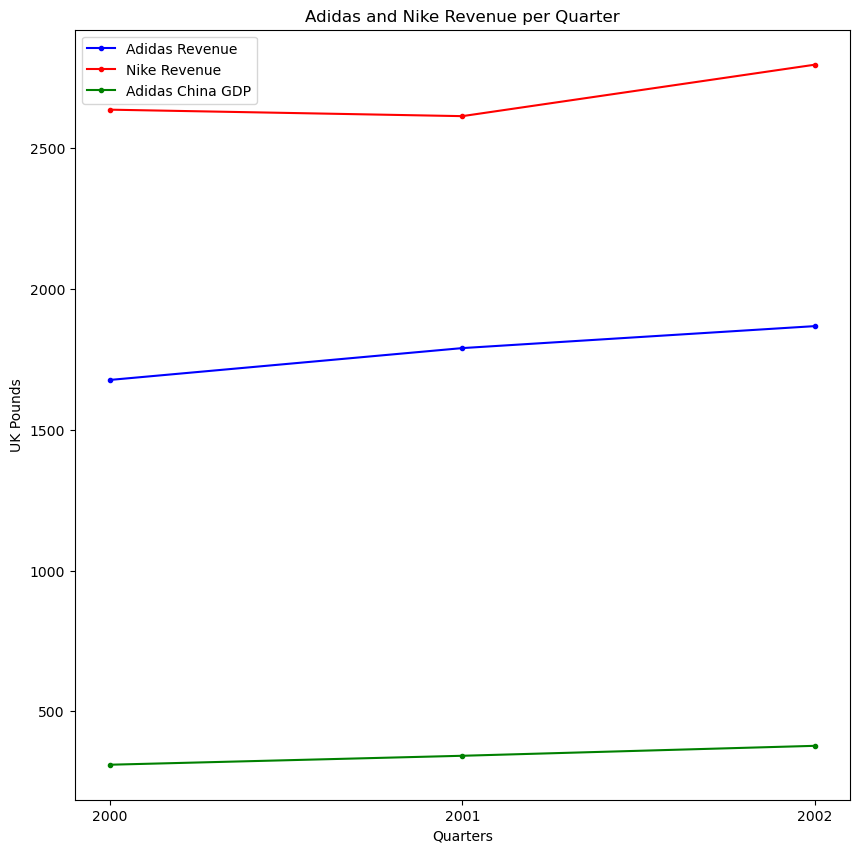

In [47]:
plt.figure(figsize=(10,10))

plt.title('Adidas and Nike Revenue per Quarter')

plt.plot(df.Date,df['Adidas Revenue'], 'b.-', label = 'Adidas Revenue')
plt.plot(df.Date,df['Nike Revenue'], 'r.-', label = 'Nike Revenue')
plt.plot(df.Date,df['Adidas China GDP'], 'g.-', label = 'Adidas China GDP')
plt.xlabel('Quarters')
plt.ylabel('UK Pounds')
plt.legend()
plt.show

In [10]:
df.head()

,Date,Adidas Revenue,Adidas Europe GDP,Adidas China GDP,Adidas Price index,Nike Revenue
2,2000,1677,1769.2586,310.55,322.5,2636.7
6,2001,1790,1845.8787,342.32,313.3,2613.7
10,2002,1868,1914.8373,377.63,298.9,2796.3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2 to 10
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3 non-null      object 
 1   Adidas Revenue      3 non-null      int64  
 2   Adidas Europe GDP   3 non-null      float64
 3   Adidas China GDP    3 non-null      float64
 4   Adidas Price index  3 non-null      float64
 5   Nike Revenue        3 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 168.0+ bytes


In [12]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2 to 10
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3 non-null      object 
 1   Adidas Revenue      3 non-null      int64  
 2   Adidas Europe GDP   3 non-null      float64
 3   Adidas China GDP    3 non-null      float64
 4   Adidas Price index  3 non-null      float64
 5   Nike Revenue        3 non-null      float64
 6   year                3 non-null      object 
dtypes: float64(4), int64(1), object(2)
memory usage: 192.0+ bytes


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
array = np.array([2000, 2001, 2002])
array = array.reshape(-1, 1)
print(array)

[[2000]
 [2001]
 [2002]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=2)
feature = ['Date']
label = ['Adidas Revenue']
x = df[feature]
y = df[label]
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [34]:
y = df.to_numpy()
y = y.reshape(-1)


In [35]:
knn.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [36]:
y_pred = knn.predict(x_test)
accuracy = knn.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


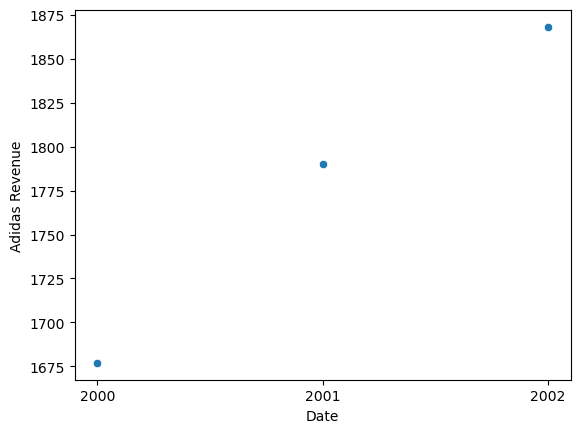

In [40]:
import seaborn as sns
sns.scatterplot(df['Date'], df['Adidas Revenue']);

<function matplotlib.pyplot.show(close=None, block=None)>

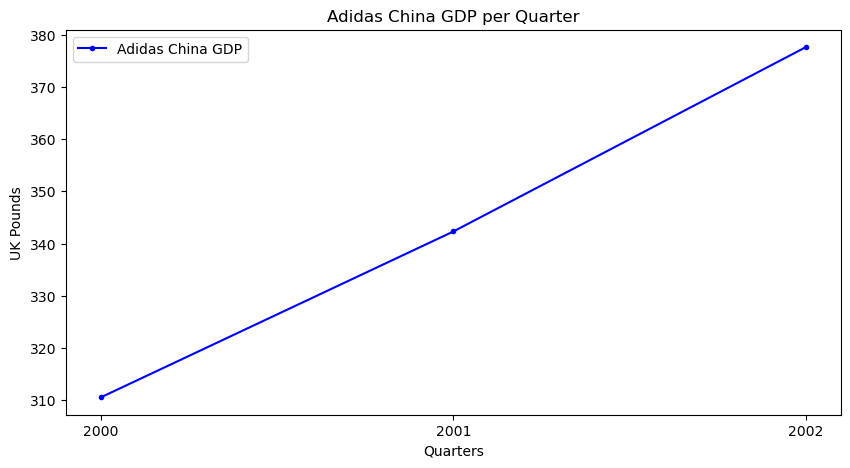

In [45]:
plt.figure(figsize=(10,5))

plt.title('Adidas China GDP per Quarter')

plt.plot(df.Date,df['Adidas China GDP'], 'b.-', label = 'Adidas China GDP')

plt.xlabel('Quarters')
plt.ylabel('UK Pounds')
plt.legend()
plt.show

In [48]:
import statistics

In [49]:
stdev = statistics.stdev(df['Adidas Revenue'])

In [50]:
mean = statistics.mean(df['Adidas Revenue'])
stdev = statistics.stdev(df['Adidas Revenue'])

In [51]:
print(f"Mean: {mean}")
print(f"Standard Deviation: {stdev}")

Mean: 1778.3333333333333
Standard Deviation: 96.03298044595583


In [52]:
stdev = statistics.stdev(df['Nike Revenue'])

In [53]:
mean = statistics.mean(df['Nike Revenue'])
stdev = statistics.stdev(df['Nike Revenue'])

In [54]:
print(f"Mean: {mean}")
print(f"Standard Deviation: {stdev}")

Mean: 2682.233333333333
Standard Deviation: 99.45176385229864


In [55]:
stdev = statistics.stdev(df['Adidas China GDP'])

In [56]:
mean = statistics.mean(df['Adidas China GDP'])
stdev = statistics.stdev(df['Adidas China GDP'])

In [57]:
print(f"Mean: {mean}")
print(f"Standard Deviation: {stdev}")

Mean: 343.5
Standard Deviation: 33.55556436718059
